In [1]:
!pip install wordcloud
!pip install emoji


## GDA

In [2]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
from textblob import TextBlob
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import seaborn as sns
df = pd.read_csv("final_keywords corrected 2.csv")
df.head()

C:\Users\rajam\AppData\Local\Temp\ipykernel_46508\2227958380.py:10: DtypeWarning: Columns (30,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("final_keywords corrected 2.csv")


,created_at,text,conversation_id,edit_history_tweet_ids,possibly_sensitive,reply_settings,lang,author_id,id,entities.urls,...,in_reply_to_user_id,username,name,location,keyword,entities.mentions,attachments.poll_ids,attachments.media_source_tweet_id,entities.cashtags,withheld.country_codes
0,2024-02-12T01:52:00.000Z,Fireman at the Superbowl https://t.co/AjqmmHvDQl,1.760000e+18,['1756858660205015180'],False,everyone,en,5.208863e+08,1.760000e+18,"[{'start': 25, 'end': 48, 'url': 'https://t.co...",...,NaN,jerkinjerky,Spencer's Jerkin' Jerky,"Gainesville, FL",max thieriot bode donovan,NaN,NaN,NaN,NaN,NaN
1,2024-02-12T01:20:00.000Z,"Watch the #SuperBowl ads for #GhostsCBS, #Fire...",1.760000e+18,['1756850607573623005'],False,everyone,en,1.809078e+07,1.760000e+18,"[{'start': 86, 'end': 109, 'url': 'https://t.c...",...,NaN,GiveMeMyRemote,GiveMeMyRemote,Wherever the TV news is.,max thieriot bode donovan,NaN,NaN,NaN,NaN,NaN
2,2024-02-12T01:15:36.000Z,Watch the #Tracker and #FireCountry #SuperBowl...,1.760000e+18,['1756849502018064847'],False,everyone,en,1.454115e+07,1.760000e+18,"[{'start': 65, 'end': 88, 'url': 'https://t.co...",...,14541151.0,marisaroffman,Marisa Roffman,NaN,max thieriot bode donovan,NaN,NaN,NaN,NaN,NaN
3,2024-02-12T01:15:17.000Z,I can't believe Norman Bates brother is a fire...,1.760000e+18,['1756849420442681386'],False,everyone,en,1.030866e+08,1.760000e+18,NaN,...,NaN,geekmentality,Geek Mentality Mike,Massachusetts,max thieriot bode donovan,NaN,NaN,NaN,NaN,NaN
4,2024-02-12T02:01:18.000Z,👉 @NFL &amp; @fifa may be occut but some of th...,1.760000e+18,['1756861000693739724'],False,everyone,en,1.750000e+18,1.760000e+18,"[{'start': 247, 'end': 270, 'url': 'https://t....",...,NaN,ryanadamtexas,Ryan Adam Texas,"Dallas, Texas USA",ultra beer,"[{'start': 2, 'end': 6, 'username': 'NFL', 'id...",NaN,NaN,NaN,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171454 entries, 0 to 171453
Data columns (total 34 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   created_at                         171454 non-null  object 
 1   text                               171454 non-null  object 
 2   conversation_id                    171454 non-null  float64
 3   edit_history_tweet_ids             171454 non-null  object 
 4   possibly_sensitive                 171454 non-null  bool   
 5   reply_settings                     171454 non-null  object 
 6   lang                               171454 non-null  object 
 7   author_id                          171454 non-null  float64
 8   id                                 171454 non-null  float64
 9   entities.urls                      81596 non-null   object 
 10  entities.annotations               156299 non-null  object 
 11  edit_controls.edits_remaining      1714

In [3]:
df.isna().sum()

created_at                                0
text                                      0
conversation_id                           0
edit_history_tweet_ids                    0
possibly_sensitive                        0
reply_settings                            0
lang                                      0
author_id                                 0
id                                        0
entities.urls                         89858
entities.annotations                  15155
edit_controls.edits_remaining             0
edit_controls.is_edit_eligible            0
edit_controls.editable_until              0
geo.place_id                         168863
attachments.media_keys               103630
public_metrics.retweet_count              0
public_metrics.reply_count                0
public_metrics.like_count                 0
public_metrics.quote_count                0
public_metrics.bookmark_count             0
public_metrics.impression_count           0
entities.hashtags               

In [4]:
df.describe()

,conversation_id,author_id,id,edit_controls.edits_remaining,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.bookmark_count,public_metrics.impression_count,in_reply_to_user_id
count,1.714540e+05,1.714540e+05,1.714540e+05,171454.000000,171454.000000,171454.000000,171454.000000,171454.000000,171454.000000,1.714540e+05,1.603500e+04
mean,1.758560e+18,9.706620e+17,1.760000e+18,4.997235,1358.228189,0.217522,3.934706,0.061276,0.169946,4.706514e+02,5.853649e+17
std,1.137808e+16,7.286786e+17,4.740622e+06,0.065727,4011.506930,5.247876,157.692866,4.490009,5.547671,9.403417e+03,7.313072e+17
min,1.100000e+18,1.483000e+03,1.760000e+18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,3.840000e+03
25%,1.760000e+18,1.396287e+09,1.760000e+18,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2.949206e+08
50%,1.760000e+18,1.260000e+18,1.760000e+18,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,8.028651e+08
75%,1.760000e+18,1.650000e+18,1.760000e+18,5.000000,339.000000,0.000000,0.000000,0.000000,0.000000,9.800000e+01,1.460000e+18
max,1.760000e+18,1.760000e+18,1.760000e+18,5.000000,66914.000000,957.000000,28554.000000,1719.000000,1062.000000,2.300994e+06,1.760000e+18


In [5]:
twitter_data = df

In [6]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171454 entries, 0 to 171453
Data columns (total 34 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   created_at                         171454 non-null  object 
 1   text                               171454 non-null  object 
 2   conversation_id                    171454 non-null  float64
 3   edit_history_tweet_ids             171454 non-null  object 
 4   possibly_sensitive                 171454 non-null  bool   
 5   reply_settings                     171454 non-null  object 
 6   lang                               171454 non-null  object 
 7   author_id                          171454 non-null  float64
 8   id                                 171454 non-null  float64
 9   entities.urls                      81596 non-null   object 
 10  entities.annotations               156299 non-null  object 
 11  edit_controls.edits_remaining      1714

In [7]:
twitter_data.head()

,created_at,text,conversation_id,edit_history_tweet_ids,possibly_sensitive,reply_settings,lang,author_id,id,entities.urls,...,in_reply_to_user_id,username,name,location,keyword,entities.mentions,attachments.poll_ids,attachments.media_source_tweet_id,entities.cashtags,withheld.country_codes
0,2024-02-12T01:52:00.000Z,Fireman at the Superbowl https://t.co/AjqmmHvDQl,1.760000e+18,['1756858660205015180'],False,everyone,en,5.208863e+08,1.760000e+18,"[{'start': 25, 'end': 48, 'url': 'https://t.co...",...,NaN,jerkinjerky,Spencer's Jerkin' Jerky,"Gainesville, FL",max thieriot bode donovan,NaN,NaN,NaN,NaN,NaN
1,2024-02-12T01:20:00.000Z,"Watch the #SuperBowl ads for #GhostsCBS, #Fire...",1.760000e+18,['1756850607573623005'],False,everyone,en,1.809078e+07,1.760000e+18,"[{'start': 86, 'end': 109, 'url': 'https://t.c...",...,NaN,GiveMeMyRemote,GiveMeMyRemote,Wherever the TV news is.,max thieriot bode donovan,NaN,NaN,NaN,NaN,NaN
2,2024-02-12T01:15:36.000Z,Watch the #Tracker and #FireCountry #SuperBowl...,1.760000e+18,['1756849502018064847'],False,everyone,en,1.454115e+07,1.760000e+18,"[{'start': 65, 'end': 88, 'url': 'https://t.co...",...,14541151.0,marisaroffman,Marisa Roffman,NaN,max thieriot bode donovan,NaN,NaN,NaN,NaN,NaN
3,2024-02-12T01:15:17.000Z,I can't believe Norman Bates brother is a fire...,1.760000e+18,['1756849420442681386'],False,everyone,en,1.030866e+08,1.760000e+18,NaN,...,NaN,geekmentality,Geek Mentality Mike,Massachusetts,max thieriot bode donovan,NaN,NaN,NaN,NaN,NaN
4,2024-02-12T02:01:18.000Z,👉 @NFL &amp; @fifa may be occut but some of th...,1.760000e+18,['1756861000693739724'],False,everyone,en,1.750000e+18,1.760000e+18,"[{'start': 247, 'end': 270, 'url': 'https://t....",...,NaN,ryanadamtexas,Ryan Adam Texas,"Dallas, Texas USA",ultra beer,"[{'start': 2, 'end': 6, 'username': 'NFL', 'id...",NaN,NaN,NaN,NaN


In [8]:
twitter_data.isna().sum()

created_at                                0
text                                      0
conversation_id                           0
edit_history_tweet_ids                    0
possibly_sensitive                        0
reply_settings                            0
lang                                      0
author_id                                 0
id                                        0
entities.urls                         89858
entities.annotations                  15155
edit_controls.edits_remaining             0
edit_controls.is_edit_eligible            0
edit_controls.editable_until              0
geo.place_id                         168863
attachments.media_keys               103630
public_metrics.retweet_count              0
public_metrics.reply_count                0
public_metrics.like_count                 0
public_metrics.quote_count                0
public_metrics.bookmark_count             0
public_metrics.impression_count           0
entities.hashtags               

In [5]:
df = df.drop_duplicates()



In [7]:
twitter_data = df
import regex
def extract_hashtags(text):
    hashtags = regex.findall(r'\#\w+', text)
    if hashtags:
        return hashtags
    else:
        return ""

def extract_emojis(text):
    emoji_pattern = regex.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=regex.UNICODE)
    emojis = emoji_pattern.findall(text)
    if emojis:
        return emojis
    else:
        return ""
def extract_mentions(text):
    mentions =  regex.findall(r'\@\w+', text)
    if mentions:
        return mentions
    else:
        return ""


twitter_data['hashtags'] = twitter_data['text'].apply(extract_hashtags)
twitter_data['emojis'] = twitter_data['text'].apply(extract_emojis)
twitter_data['mentions'] = twitter_data['text'].apply(extract_mentions)
twitter_data[[ 'hashtags', 'emojis','mentions']].head()

,hashtags,emojis,mentions
0,,,
1,"[#SuperBowl, #GhostsCBS, #FireCountry, #Shogun...",,
2,"[#Tracker, #FireCountry, #SuperBowl]",,
3,"[#FireCountry, #Superbowl]",,
4,"[#superbowl, #fifa, #worldcup, #messi, #cristi...","[👉, 🙌]","[@NFL, @fifa, @Cristiano, @TeamMessi, @Patrick..."


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rajam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rajam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


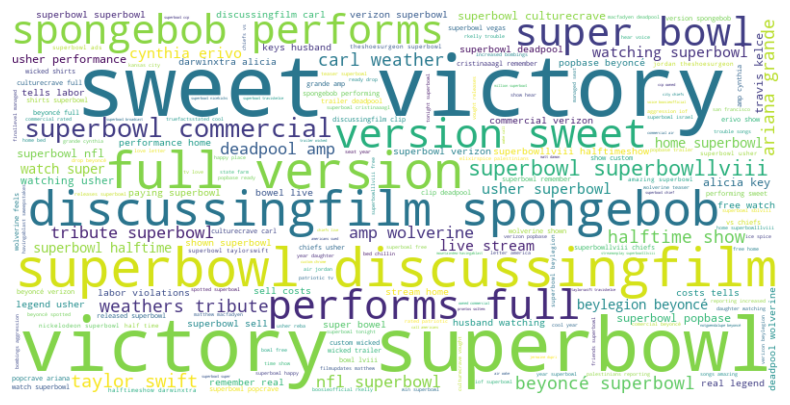

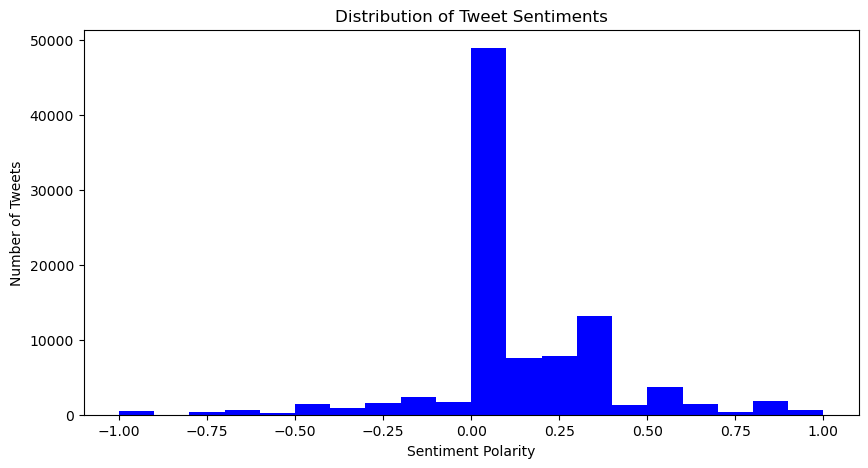

count    96407.000000
mean         0.113415
std          0.262374
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.285714
max          1.000000
Name: sentiment, dtype: float64

In [8]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming df is your DataFrame and it's already loaded into twitter_data
twitter_data = df

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Accumulate stopwords from all languages provided by NLTK
all_stopwords = set()
for lang in stopwords.fileids():
    all_stopwords.update(stopwords.words(lang))

# Specified words to exclude in addition to stopwords
s = ['https', 'rt', 'vol', 'written']

# Define a function to calculate sentiment
def calculate_sentiment(text: str) -> float:
    return TextBlob(text).sentiment.polarity

# Function to remove URLs from text
def remove_urls(text):
    return " ".join([word for word in text.split() if 'http' not in word and 'www' not in word])

# Preprocess the text column: remove NaN values, URLs, tokenize, and remove stopwords and specified words
twitter_data = twitter_data.dropna(subset=['text'])
twitter_data['clean_text'] = twitter_data['text'].apply(remove_urls)
twitter_data['tokens'] = twitter_data['clean_text'].apply(
    lambda x: [word.lower() for word in word_tokenize(x) if word.lower() not in all_stopwords and word.isalpha() and word.lower() not in s]
)

# Generate a word cloud
all_words = ' '.join([word for tokens in twitter_data['tokens'] for word in tokens])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Calculate sentiment for each tweet
twitter_data['sentiment'] = twitter_data['clean_text'].apply(calculate_sentiment)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Display the distribution of sentiments
plt.figure(figsize=(10, 5))
plt.hist(twitter_data['sentiment'], bins=20, color='blue')
plt.title('Distribution of Tweet Sentiments')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Number of Tweets')
plt.show()

# Show basic sentiment statistics
sentiment_summary = twitter_data['sentiment'].describe()
sentiment_summary


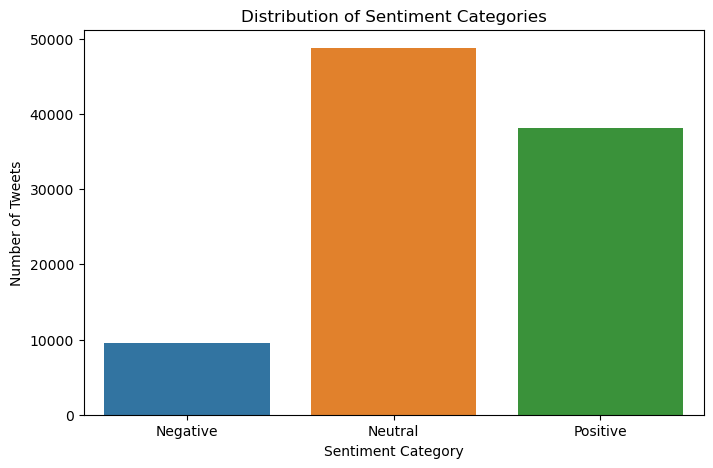

In [9]:
# Define a function to categorize sentiment scores into sentiment categories
def categorize_sentiment(score):
    if score < 0:
        return 'Negative'
    elif score > 0.10:
        return 'Positive'
    else:
        return 'Neutral'

# Apply the function to create a new column 'sentiment_category' in the DataFrame
twitter_data['sentiment_category'] = twitter_data['sentiment'].apply(categorize_sentiment)

# Reach Analysis: Count of tweets per advertisement keyword
reach_analysis = twitter_data['keyword'].value_counts().head(15)

# Engagement Analysis: Distribution of sentiment categories
engagement_analysis = twitter_data['sentiment_category'].value_counts()

# Sentiment Distribution Visualization
plt.figure(figsize=(8, 5))
sns.barplot(x=engagement_analysis.index, y=engagement_analysis.values, order=['Negative', 'Neutral', 'Positive'])
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Tweets')

plt.show()


In [10]:
# Convert 'sentiment_category' to categorical
twitter_data['sentiment_category'] = twitter_data['sentiment_category'].astype('category')

# Fill missing values with the most frequent category
most_frequent_category = twitter_data['sentiment_category'].value_counts().index[0]
twitter_data['sentiment_category'].fillna(most_frequent_category, inplace=True)


In [11]:
twitter_data.isna().sum()

created_at                               0
text                                     0
conversation_id                          0
edit_history_tweet_ids                   0
possibly_sensitive                       0
reply_settings                           0
lang                                     0
author_id                                0
id                                       0
entities.urls                        51406
entities.annotations                  8888
edit_controls.edits_remaining            0
edit_controls.is_edit_eligible           0
edit_controls.editable_until             0
geo.place_id                         95117
attachments.media_keys               56041
public_metrics.retweet_count             0
public_metrics.reply_count               0
public_metrics.like_count                0
public_metrics.quote_count               0
public_metrics.bookmark_count            0
public_metrics.impression_count          0
entities.hashtags                    24875
referenced_

In [12]:
# Check for tweets with celebrity and/or brand mentions
twitter_data['has_mentions'] = twitter_data['mentions'].apply(lambda x: len(x) > 0)

# Analysis of tweet counts with and without mentions
tweets_with_mentions_count = twitter_data['has_mentions'].sum()
tweets_without_mentions_count = len(twitter_data) - tweets_with_mentions_count

# Display the counts for tweets with and without mentions
tweets_with_mentions_count, tweets_without_mentions_count


(75606, 20801)

In [13]:
twitter_data.head()

,created_at,text,conversation_id,edit_history_tweet_ids,possibly_sensitive,reply_settings,lang,author_id,id,entities.urls,...,entities.cashtags,withheld.country_codes,hashtags,emojis,mentions,clean_text,tokens,sentiment,sentiment_category,has_mentions
0,2024-02-12T01:52:00.000Z,Fireman at the Superbowl https://t.co/AjqmmHvDQl,1.760000e+18,['1756858660205015180'],False,everyone,en,5.208863e+08,1.760000e+18,"[{'start': 25, 'end': 48, 'url': 'https://t.co...",...,NaN,NaN,,,,Fireman at the Superbowl,"[fireman, superbowl]",0.00,Neutral,False
1,2024-02-12T01:20:00.000Z,"Watch the #SuperBowl ads for #GhostsCBS, #Fire...",1.760000e+18,['1756850607573623005'],False,everyone,en,1.809078e+07,1.760000e+18,"[{'start': 86, 'end': 109, 'url': 'https://t.c...",...,NaN,NaN,"[#SuperBowl, #GhostsCBS, #FireCountry, #Shogun...",,,"Watch the #SuperBowl ads for #GhostsCBS, #Fire...","[watch, superbowl, ads, ghostscbs, firecountry...",0.50,Positive,False
2,2024-02-12T01:15:36.000Z,Watch the #Tracker and #FireCountry #SuperBowl...,1.760000e+18,['1756849502018064847'],False,everyone,en,1.454115e+07,1.760000e+18,"[{'start': 65, 'end': 88, 'url': 'https://t.co...",...,NaN,NaN,"[#Tracker, #FireCountry, #SuperBowl]",,,Watch the #Tracker and #FireCountry #SuperBowl...,"[watch, tracker, firecountry, superbowl, ads, ...",0.00,Neutral,False
3,2024-02-12T01:15:17.000Z,I can't believe Norman Bates brother is a fire...,1.760000e+18,['1756849420442681386'],False,everyone,en,1.030866e+08,1.760000e+18,NaN,...,NaN,NaN,"[#FireCountry, #Superbowl]",,,I can't believe Norman Bates brother is a fire...,"[believe, norman, bates, brother, fire, fighte...",0.00,Neutral,False
4,2024-02-12T02:01:18.000Z,👉 @NFL &amp; @fifa may be occut but some of th...,1.760000e+18,['1756861000693739724'],False,everyone,en,1.750000e+18,1.760000e+18,"[{'start': 247, 'end': 270, 'url': 'https://t....",...,NaN,NaN,"[#superbowl, #fifa, #worldcup, #messi, #cristi...","[👉, 🙌]","[@NFL, @fifa, @Cristiano, @TeamMessi, @Patrick...",👉 @NFL &amp; @fifa may be occut but some of th...,"[nfl, amp, fifa, occut, athletes, believers, a...",0.25,Positive,True


In [14]:
twitter_data.isna().sum()

created_at                               0
text                                     0
conversation_id                          0
edit_history_tweet_ids                   0
possibly_sensitive                       0
reply_settings                           0
lang                                     0
author_id                                0
id                                       0
entities.urls                        51406
entities.annotations                  8888
edit_controls.edits_remaining            0
edit_controls.is_edit_eligible           0
edit_controls.editable_until             0
geo.place_id                         95117
attachments.media_keys               56041
public_metrics.retweet_count             0
public_metrics.reply_count               0
public_metrics.like_count                0
public_metrics.quote_count               0
public_metrics.bookmark_count            0
public_metrics.impression_count          0
entities.hashtags                    24875
referenced_

In [15]:
twitter_data.to_csv('Final_clean_data3.csv', index = False)

In [16]:
data = pd.read_csv('Final_clean_data3.csv')

In [19]:
# Since we need to use the 'keyword' column instead of 'clean_text', let's adjust our approach.
import ast
# We'll extract the 'keyword' and 'emojis' columns where emojis are not NaN
emojis_data = data[['keyword', 'emojis']].dropna(subset=['emojis'])

# Convert the 'emojis' column from string representation of lists to actual lists
emojis_data['emojis'] = emojis_data['emojis'].apply(ast.literal_eval)

# Initialize an empty dictionary to store emoji counts for each keyword
emoji_counts_by_keyword = {}

# Iterate over the rows in the dataframe that contain emojis
for _, row in emojis_data.iterrows():
    keyword = row['keyword']
    emoji_list = row['emojis']
    
    # If the keyword is not in the dictionary, add it with an empty dictionary as its value
    if keyword not in emoji_counts_by_keyword:
        emoji_counts_by_keyword[keyword] = {}
    
    # Count each emoji in the list for the current keyword
    for emoji in emoji_list:
        if emoji in emoji_counts_by_keyword[keyword]:
            emoji_counts_by_keyword[keyword][emoji] += 1
        else:
            emoji_counts_by_keyword[keyword][emoji] = 1

# Find the top emoji for each keyword
top_emojis_by_keyword = {}
for keyword, counts in emoji_counts_by_keyword.items():
    # Sort the emojis by count in descending order and get the top one
    top_emoji = max(counts, key=counts.get)
    top_emojis_by_keyword[keyword] = {'emoji': top_emoji, 'count': counts[top_emoji]}

# Convert the top_emojis_by_keyword to a DataFrame for better visualization
top_emojis_by_keyword_df = pd.DataFrame(top_emojis_by_keyword).T.reset_index()
top_emojis_by_keyword_df.rename(columns={'index': 'keyword', 'emoji': 'top_emoji', 'count': 'top_emoji_count'}, inplace=True)

top_emojis_by_keyword_df.to_csv('Emoji_brand1.csv', index = False)
